In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%load_ext line_profiler
%load_ext memory_profiler

import scqubits as qubit
qubit.settings.MULTIPROC = 'pathos'
#print(qubit.__version__)
import scqubits.utils.sweep_plotting as splot
from scqubits import HilbertSpace, ParameterSweep, InteractionTerm
from scqubits.core.storage import SpectrumData

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
N = 4
kmax = 8
ECB = 0.2 # 100 fF
ECJ = 35.
ECg = 45.
flux = 0.0
EJ = 10.0
EJlist = np.array([EJ for j in range(2*N)])
nglist = np.array([0.0 for j in range(2*N-1)])
num_exc = 3
CMV = qubit.CurrentMirrorVTB(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                               maximum_periodic_vector_length=kmax, num_exc=num_exc,truncated_dim=6)
CMVG = qubit.CurrentMirrorVTBGlobal(N, ECB, ECJ, ECg, EJlist, nglist, flux, num_exc=num_exc,
                                      maximum_periodic_vector_length=kmax, truncated_dim=6)
CM = qubit.CurrentMirrorGlobal(N, ECB, ECJ, ECg, EJlist, nglist, flux, num_exc=3, truncated_dim=6)

In [4]:
CMVG.retained_unit_cell_displacement_vectors

{(0,
  0): array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [-1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  2., -2., ...,  0.,  2., -2.],
        [ 0., -2.,  2., ...,  0., -2.,  2.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 (0,
  1): array([[-1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., -1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0., -1., ...,  0.,  0.,  0.],
        ...,
        [-1.,  1., -1., ..., -1.,  2., -1.],
        [-1., -1.,  1., ..., -1., -1.,  2.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 (0,
  2): array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        ...,
        [ 1., -1.,  1., ...,  1., -2.,  1.],
        [ 1.,  1., -1., ...,  1.,  1., -2.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 (1,
  2): array([[ 0,  1,  0,  0,  0,  0,  0],
        [ 0,  0,  1,  0,  0,  0,  0],
        [ 0,  0,  0,  1,  0, 

In [8]:
%mprun -f CMVG._periodic_continuation CMVG.kinetic_matrix()

In [4]:
%lprun -f CMVG._local_translation_operators CMVG.kinetic_matrix()

In [21]:
CM.identity_operator()

<1159x1159 sparse matrix of type '<class 'numpy.complex128'>'
	with 1159 stored elements in Compressed Sparse Row format>

In [ ]:
evals_N8 = CMVG.eigenvals()

In [ ]:
global_exc_list = np.arange(4, 5)
specdata_N8 = CMVG.get_spectrum_vs_paramvals("global_exc", global_exc_list, evals_count=6)

In [ ]:
specdata_N8.energy_table

In [ ]:
specdata_N4_k1.filewrite('N_4_f_49.h5')

In [ ]:
specdata_N5.filewrite('N_5_f_49.h5')
specdata_N6.filewrite('N_6_f_49.h5')
specdata_N7.filewrite('N_7_f_49.h5')

In [ ]:
global_exc_list = np.arange(1, 7)
specdata = CMVG.get_spectrum_vs_paramvals("global_exc", global_exc_list, evals_count=6)

In [ ]:
specdata.energy_table

In [ ]:
global_exc_list = np.arange(1, 5)
specdata_N8 = CMVG.get_spectrum_vs_paramvals("global_exc", global_exc_list, evals_count=6)

In [ ]:
specdata_N7.energy_table

In [ ]:
specdata_N6.energy_table

In [ ]:
specdata_N5.energy_table

In [ ]:
specdata_N4_k1.energy_table

In [ ]:
specdata_N4.energy_table

In [ ]:
CMVG.global_exc = 4
print(CMVG.hilbertdim())
evals = CMVG.eigenvals()
print(evals-evals[0])

In [ ]:
CM.eigenvals()

In [1]:
specdata_N8.energy_table

NameError: name 'specdata_N8' is not defined

In [28]:
specdata_N4_k1.filewrite('N_4_f_49.h5')

In [29]:
specdata_N5.filewrite('N_5_f_49.h5')
specdata_N6.filewrite('N_6_f_49.h5')
specdata_N7.filewrite('N_7_f_49.h5')

In [8]:
global_exc_list = np.arange(1, 7)
specdata = CMVG.get_spectrum_vs_paramvals("global_exc", global_exc_list, evals_count=6)

In [9]:
specdata.energy_table

array([[51.50121737, 52.5507921 , 54.89594381, 54.89594393, 55.92694824,
        55.92694832],
       [51.3568503 , 52.38756668, 54.8848173 , 54.88481733, 55.91492072,
        55.91492074],
       [51.29846934, 52.32354921, 54.69333996, 54.69333997, 55.70097092,
        55.70097093],
       [51.2665106 , 52.28957601, 54.62049993, 54.62049994, 55.62105272,
        55.62105273],
       [51.26446591, 52.28709081, 54.57716321, 54.57716321, 55.57469605,
        55.57469606],
       [51.262445  , 52.28473277, 54.57325349, 54.57325349, 55.5699784 ,
        55.5699784 ]])

In [ ]:
global_exc_list = np.arange(1, 5)
specdata_N8 = CMVG.get_spectrum_vs_paramvals("global_exc", global_exc_list, evals_count=6)

In [1]:
specdata_N7.energy_table

NameError: name 'specdata_N7' is not defined

In [21]:
specdata_N6.energy_table

array([[95.55325285, 96.08684575, 97.39873899, 97.398739  , 97.93000157,
        97.93000157],
       [95.13232376, 95.65472865, 97.3973423 , 97.3973423 , 97.92848945,
        97.92848946],
       [95.08336384, 95.60157049, 96.94792733, 96.94792733, 97.46746351,
        97.46746351],
       [94.98530998, 95.50189193, 96.89707074, 96.89707074, 97.41224892,
        97.41224892]])

In [18]:
specdata_N5.energy_table

array([[80.25697493, 80.89616844, 82.44565541, 82.44565543, 83.0808226 ,
        83.08082261],
       [79.9271452 , 80.55327972, 82.44323582, 82.44323583, 83.07820373,
        83.07820374],
       [79.87304768, 80.4944694 , 82.0800517 , 82.08005171, 82.70120259,
        82.70120259],
       [79.79746186, 80.41710871, 82.02265095, 82.02265096, 82.63880505,
        82.63880506],
       [79.79436405, 80.41362901, 81.93895148, 81.93895148, 82.55306573,
        82.55306574]])

In [15]:
specdata_N4_k1.energy_table

array([[65.37139449, 66.16724349, 68.04731167, 68.04731178, 68.83530259,
        68.83530261],
       [65.13442546, 65.91474242, 68.04258314, 68.04258317, 68.83018685,
        68.83018687],
       [65.07584597, 65.85089985, 67.76608855, 67.76608857, 68.53664378,
        68.53664379],
       [65.02246733, 65.79559815, 67.70112099, 67.701121  , 68.46583952,
        68.46583952],
       [65.01969927, 65.79241672, 67.63839107, 67.63839108, 68.40071747,
        68.40071747]])

In [12]:
specdata_N4.energy_table

array([[65.37139449, 66.16724349, 68.04731167, 68.04731178, 68.83530259,
        68.83530261],
       [65.13442546, 65.91474242, 68.04258314, 68.04258317, 68.83018685,
        68.83018687],
       [65.07584597, 65.85089985, 67.76608855, 67.76608857, 68.53664378,
        68.53664379],
       [65.02246733, 65.79559815, 67.70112099, 67.701121  , 68.46583952,
        68.46583952],
       [65.01969927, 65.79241672, 67.63839107, 67.63839108, 68.40071747,
        68.40071747]])

In [3]:
CMVG.global_exc = 4
print(CMVG.hilbertdim())
evals = CMVG.eigenvals()
print(evals-evals[0])

252
[0.         3.3996489  3.39964891 5.11256754 6.64733319 6.79778248]


In [4]:
CM.eigenvals()

array([59.19649309, 73.77618948, 74.45528633, 79.75352152, 86.2718681 ,
       88.1625236 ])

In [9]:
ncut_list = np.arange(1, 13)
specdata = CM.get_spectrum_vs_paramvals("ncut", ncut_list, evals_count=6, num_cpus=2)

In [38]:
global_exc_max = 9
num_exc_list = np.arange(1, global_exc_max)
specdata_CMVG = CMVG.get_spectrum_vs_paramvals("global_exc", num_exc_list, evals_count=6, num_cpus=2)

In [10]:
specdata.energy_table

array([[59.19649309, 73.77618948, 74.45528633, 79.75352152, 86.2718681 ,
        88.1625236 ],
       [44.33733132, 52.19049383, 53.47910749, 58.08261061, 60.27807922,
        62.73016964],
       [40.24186028, 45.21880419, 46.78464933, 49.47883034, 50.55880156,
        52.64319555],
       [39.03193093, 42.99216351, 44.06247641, 46.65003223, 47.13077995,
        48.48030046],
       [38.68315215, 42.35969953, 42.83430897, 45.89445258, 46.0712376 ,
        46.6743395 ],
       [38.59133215, 42.20873052, 42.3641053 , 45.69954072, 45.80877641,
        46.00696614],
       [38.5708086 , 42.17926969, 42.21736452, 45.65152554, 45.75774422,
        45.81186909],
       [38.56710645, 42.17463656, 42.18163243, 45.64114083, 45.74843017,
        45.76852139],
       [38.56657642, 42.1740422 , 42.17501628, 45.6393353 , 45.74254698,
        45.76119402],
       [38.56651621, 42.17397923, 42.1740839 , 45.63909364, 45.73976146,
        45.76022719],
       [38.56651076, 42.17397373, 42.17398256, 45.

In [48]:
hilbert_dim_list = []
rel_dev_list = []
for num in range(11):
    CM.ncut = num+1
    hilbert_dim_list.append(CM.hilbertdim())
    rel_dev = np.abs(specdata.energy_table[num][0:3]-specdata.energy_table[-1][0:3])/specdata.energy_table[-1][0:3]
    rel_dev_list.append(np.max(rel_dev))

In [49]:
hilbert_dim_list_CMVG = []
rel_dev_list_CMVG = []
for num in range(global_exc_max-1):
    CMVG.global_exc = num+1
    hilbert_dim_list_CMVG.append(CMVG.hilbertdim())
    rel_dev = np.abs(specdata_CMVG.energy_table[num][0:3]-specdata.energy_table[-1][0:3])/specdata.energy_table[-1][0:3]
    rel_dev_list_CMVG.append(np.max(rel_dev))

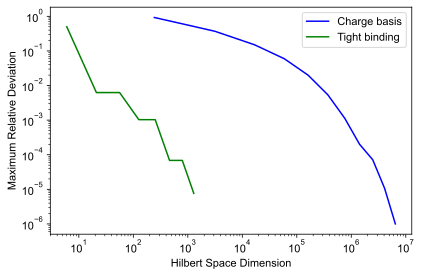

In [47]:
fig, ax = plt.subplots()
ax.plot(hilbert_dim_list, rel_dev_list, color="blue", label="Charge basis")
ax.plot(hilbert_dim_list_CMVG, rel_dev_list_CMVG, color="green", label="Tight binding")
legend = ax.legend()
plt.xlabel('Hilbert Space Dimension')
plt.ylabel('Maximum Relative Deviation')
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
plt.savefig('compare_tb_ed_CM.pdf')
plt.show()

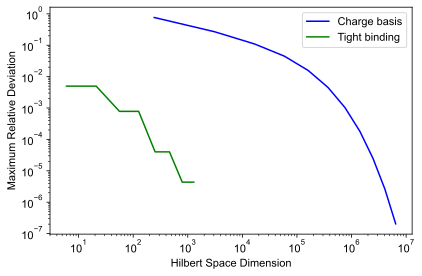

In [50]:
fig, ax = plt.subplots()
ax.plot(hilbert_dim_list, rel_dev_list, color="blue", label="Charge basis")
ax.plot(hilbert_dim_list_CMVG, rel_dev_list_CMVG, color="green", label="Tight binding")
legend = ax.legend()
plt.xlabel('Hilbert Space Dimension')
plt.ylabel('Maximum Relative Deviation')
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
plt.savefig('compare_tb_ed_CM_2.pdf')
plt.show()

In [ ]:
CM.eigenvals()

In [14]:
CM.eigenvals()

array([38.56651621, 42.17397923, 42.1740839 , 45.63909364, 45.73976146,
       45.76022719])

In [12]:
CM.eigenvals()

array([38.56657642, 42.1740422 , 42.17501628, 45.6393353 , 45.74254698,
       45.76119402])

In [10]:
CM.eigenvals()

array([38.56710645, 42.17463656, 42.18163243, 45.64114083, 45.74843017,
       45.76852139])

In [8]:
CM.eigenvals()

array([38.5708086 , 42.17926969, 42.21736452, 45.65152554, 45.75774422,
       45.81186909])

In [6]:
CM.eigenvals()

array([38.59133215, 42.20873052, 42.3641053 , 45.69954072, 45.80877641,
       46.00696614])

In [4]:
CM.eigenvals()

array([38.68315215, 42.35969953, 42.83430897, 45.89445258, 46.0712376 ,
       46.6743395 ])

In [7]:
inn = CMVG.inner_product()
eigs, _ = sp.linalg.eigh(inn)

KeyboardInterrupt: 

In [4]:
ham = CM.hamiltonian()

In [5]:
density = ham.getnnz() / np.prod(ham.shape)
print(density*CM.hilbertdim()**2)

1825151.0


In [52]:
CM.eigenvals()

array([55.91260084, 60.03481805, 60.03481866, 63.93311401, 63.9916677 ,
       64.09493829])

In [57]:
print(CM.eigenvals(), CM.nglist)

[55.91260084 60.03481805 60.03481866 63.93311401 63.9916677  64.09493829] [0. 0. 0.]


In [ ]:
for flux in flux_list:
#    EJlist = np.array([EJ for j in range(2*N)])
#    nglist = np.array([0.0 for j in range(2*N)])
    CMV = qubit.CurrentMirrorVCHOS(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                                          kmax=kmax, num_exc=2, 
                                          squeezing=False, truncated_dim=6)
    CMV.flux=flux
    specdata = CMVG.get_spectrum_vs_paramvals('flux', flux_list, evals_count = 6, 
                                              get_eigenstates=True, num_cpus=3)
    specdata.filewrite("CM_N_"+str(N)+"_n_5_flux.h5")
    print(N)
    

4


5


6


In [17]:
flux_list = np.linspace(0.0, 0.5, 11)
specdata = CMVG.get_spectrum_vs_paramvals('flux', flux_list, evals_count = 6, 
                                              get_eigenstates=True, num_cpus=2)

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f36500dc090>)

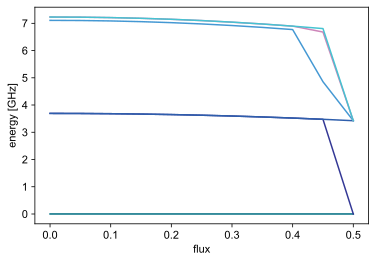

In [19]:
specdata.plot_evals_vs_paramvals(subtract_ground=True)

In [10]:
flux_list = np.linspace(0.0, 0.5, 21)
specdata = CM.get_spectrum_vs_paramvals('flux', flux_list, evals_count = 6, get_eigenstates=True, num_cpus=3)
specdata.filewrite("CM_N_3_n_6_flux.h5")

In [13]:
flux_list = np.linspace(0.0, 0.5, 21)
specdata = CMVG.get_spectrum_vs_paramvals('flux', flux_list, evals_count = 6, get_eigenstates=True, 
                                          num_cpus=3)
specdata.filewrite("CMVG_N_3_n_5_test2.h5")

Process ForkPoolWorker-13:
Process ForkPoolWorker-11:
Process ForkPoolWorker-12:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/dkweiss/anacond

In [17]:
ED_datafromfile_8 = SpectrumData.create_from_file("CM_N_3_n_8_flux.h5")

In [19]:
vchos_datafromfile_5 = SpectrumData.create_from_file("CMVG_N_3_n_5_test2.h5")
vchos_datafromfile_4 = SpectrumData.create_from_file("CMVG_N_3_n_4_test2.h5")
vchos_datafromfile_3 = SpectrumData.create_from_file("CMVG_N_3_n_3_test2.h5")
vchos_datafromfile_2 = SpectrumData.create_from_file("CMVG_N_3_n_2_test2.h5")

In [13]:
vchos_datafromfile_4 = SpectrumData.create_from_file("CM_N_4n_5_flux.h5")
vchos_datafromfile_5 = SpectrumData.create_from_file("CM_N_5n_5_flux.h5")
vchos_datafromfile_6 = SpectrumData.create_from_file("CM_N_6n_5_flux.h5")
vchos_datafromfile_7 = SpectrumData.create_from_file("CM_N_7n_5_flux.h5")

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbe28278910>)

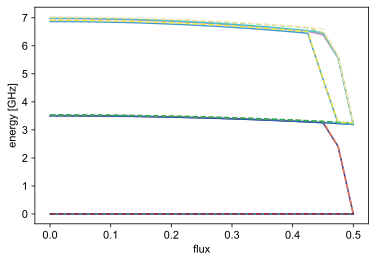

In [28]:
fig, axes = ED_datafromfile_8.plot_evals_vs_paramvals(subtract_ground=True)
#vchos_datafromfile_5.plot_evals_vs_paramvals(subtract_ground=True, fig_ax=[fig, axes], linestyle='-.')
vchos_datafromfile_4.plot_evals_vs_paramvals(subtract_ground=True, fig_ax=[fig, axes], linestyle='--')

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f36521d2850>)

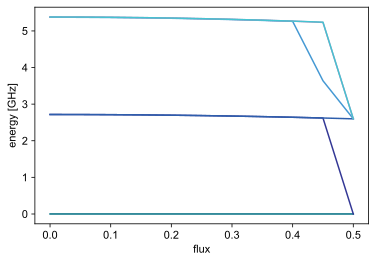

In [14]:
vchos_datafromfile_4.plot_evals_vs_paramvals(subtract_ground=True)

In [8]:
print(datafromfile.state_table[0][0])

[ 9.97552811e-01+0.j -1.04133692e-16+0.j  1.82897008e-16+0.j
 -2.53374904e-15+0.j -4.40978258e-02+0.j  2.28694866e-12+0.j]


In [10]:
print(datafromfile.system_params)

{'ECB': 0.2, 'ECJ': 7.4074074074074066, 'ECg': 20.0, 'N': 3, 'flux': 0.0, 'global_exc': 2, 'kmax': 1, 'squeezing': False, 'truncated_dim': 6, 'EJlist': array([18.9586, 18.9586, 18.9586, 18.9586, 18.9586, 18.9586]), 'nglist': array([0., 0., 0., 0., 0.])}


In [33]:
phik_1 = np.array([-1, 0, 1, -1, 0])
phik_2 = np.array([-1, 1, 0, -1, 1])
phik_3 = np.array([0, -1, 1, 0, -1])
#print(np.dot(np.array([-1, 0, 1, -1, 0]), np.array([-1, 1, 0, -1, 1]))/(np.sqrt(3)*2))
dpkX_1 = np.matmul(delta_inv, phik_1)
dpkX_2 = np.matmul(delta_inv, phik_2)
dpkX_3 = np.matmul(delta_inv, phik_3)
print(dpkX_1, dpkX_2, dpkX_3)

[-1.19903871e+00 -5.99519356e-01  4.88498131e-15 -1.19903871e+00
 -5.99519356e-01] [-5.99519356e-01  5.99519356e-01  8.88178420e-16 -5.99519356e-01
  5.99519356e-01] [-5.99519356e-01 -1.19903871e+00  3.55271368e-15 -5.99519356e-01
 -1.19903871e+00]


In [44]:
Xi = CMVG.Xi_matrix()
Xi_inv = sp.linalg.inv(Xi)
evalsxi, evecsxi = sp.linalg.eig(Xi_inv)
#print(Xi_inv)
print(evalsxi)
print(evecsxi)
delta_inv = np.matmul(Xi_inv.T, Xi_inv)
#print(delta_inv)
evals, evecs = sp.linalg.eigh(delta_inv)
print(evals)
#print(evecs[:,2])
#print(evecs[:,3])
print(evecs[:,0])
print(evecs[:,1])

[ 3.40554675+0.j          1.04295503+0.61359158j  1.04295503-0.61359158j
  0.02596119+1.43551626j  0.02596119-1.43551626j -1.65041704+0.j
 -1.36487496+0.j        ]
[[-0.43589145+0.j         -0.17441221-0.28040948j -0.17441221+0.28040948j
  -0.29839499-0.40679528j -0.29839499+0.40679528j -0.68056919+0.j
   0.35180214+0.j        ]
 [-0.70632377+0.j          0.25330516+0.37097416j  0.25330516-0.37097416j
  -0.14102344+0.29700037j -0.14102344-0.29700037j -0.16005921+0.j
   0.41240495+0.j        ]
 [-0.4462041 +0.j         -0.4502077 +0.09414549j -0.4502077 -0.09414549j
  -0.2540201 -0.17086302j -0.2540201 +0.17086302j  0.64037869+0.j
  -0.60560243+0.j        ]
 [-0.19868068+0.j          0.20834793+0.00703964j  0.20834793-0.00703964j
   0.5829043 +0.j          0.5829043 -0.j          0.05874976+0.j
  -0.21737439+0.j        ]
 [ 0.10606262+0.j          0.15801112-0.38720884j  0.15801112+0.38720884j
  -0.13832726-0.0735677j  -0.13832726+0.0735677j   0.18650308+0.j
  -0.0536571 +0.j        ]
 

In [34]:
hilbertspcvchos = HilbertSpace([CMVG])
hilbertspcvchos.interaction_list = []
points = 11
param_name = 'ng'
param_vals = np.linspace(0.0, 1.0, points)

subsys_update_list = [CMVG]

def update_hilbertspace(param_val):
    nglist = np.zeros(2*N)
    nglist[0] = param_val
#    nglist = np.array([param_val for _ in range(2*N)])
    V_m = CMVG._build_V_m()
    CMVG.nglist = np.dot(sp.linalg.inv(V_m).T, nglist)[0:-1]

    
sweep = ParameterSweep(param_name=param_name, param_vals=param_vals,
                       evals_count=6, hilbertspace=hilbertspcvchos,
                       subsys_update_list=subsys_update_list,
                       update_hilbertspace=update_hilbertspace, num_cpus=2)

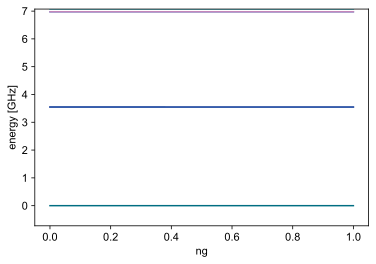

In [35]:
fig, axes = splot.dressed_spectrum(sweep)

In [33]:
hilbertspcED = HilbertSpace([CM])
hilbertspcED.interaction_list = []
points = 11
param_vals = np.linspace(0.0, 1.0, points)

subsys_update_list = [CM]

param_name = "n_g"
def update_hilbertspace(param_val):
    nglist = np.zeros(2*N)
    nglist[0] = param_val
#    nglist = np.array([param_val for _ in range(2*N)])
    V_m = CM._build_V_m()
    CM.nglist = np.dot(sp.linalg.inv(V_m).T, nglist)[0:-1]
    
sweepED = ParameterSweep(param_name=param_name, param_vals=param_vals,
                       evals_count=6, hilbertspace=hilbertspcED,
                       subsys_update_list=subsys_update_list,
                       update_hilbertspace=update_hilbertspace)

In [37]:
axes.properties()['children'][4].set_linestyle('--')
axes.properties()['children'][5].set_linestyle('--')
axes.properties()['children'][6].set_linestyle('--')
axes.properties()['children'][7].set_linestyle('--')

In [ ]:
splot.dressed_spectrum(sweepED, ylim=(-1,12), fig_ax = [fig, axes])[0]

In [ ]:
sweepED.dressed_specdata.energy_table

In [ ]:
flux_list = np.linspace(0.4, 0.5, 11)
CMVG.plot_evals_vs_paramvals('flux', flux_list, evals_count=6, subtract_ground=False)

In [ ]:
flux_list = np.linspace(0.0, 1.0, 21)
fig, axes = CM.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False)
CMVG.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False, fig_ax=[fig, axes])
axes.properties()['children'][4].set_linestyle('--')
axes.properties()['children'][5].set_linestyle('--')
axes.properties()['children'][6].set_linestyle('--')
axes.properties()['children'][7].set_linestyle('--')

In [ ]:
x = np.array([[0,1], [1,0]])
xs = np.array([x, x])
print(xs)
np.matrix.prod(xs, axis=0)

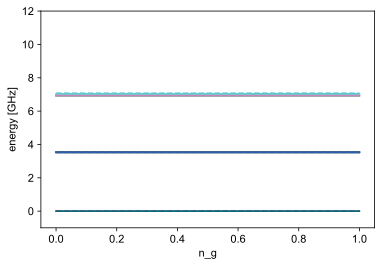

In [38]:
%lprun -f CMVG.kineticmat CMVG.kineticmat()

In [39]:
sweepED.dressed_specdata.energy_table

array([[14.78490403, 18.3063538 , 18.30635382, 21.70266737, 21.7135392 ,
        21.81672078],
       [14.78491399, 18.30636864, 18.30636867, 21.70269299, 21.71356163,
        21.81674363],
       [14.7849429 , 18.3064117 , 18.30641176, 21.70276733, 21.71362673,
        21.81680994],
       [14.78498793, 18.30647877, 18.30647888, 21.70288307, 21.71372815,
        21.81691318],
       [14.78504467, 18.3065633 , 18.30656346, 21.70302883, 21.71385596,
        21.81704317],
       [14.78510757, 18.30665702, 18.30665722, 21.70319028, 21.71399768,
        21.81718715],
       [14.78517047, 18.30675076, 18.30675098, 21.70335157, 21.71413945,
        21.81733097],
       [14.78522721, 18.30683535, 18.30683556, 21.70349693, 21.71426739,
        21.81746056],
       [14.78527224, 18.3069025 , 18.30690267, 21.70361216, 21.71436898,
        21.81756326],
       [14.78530116, 18.30694564, 18.30694576, 21.70368609, 21.71443426,
        21.81762911],
       [14.78531112, 18.30696052, 18.30696061, 21.

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2c5e6d64d0>)

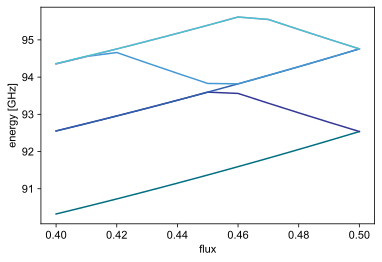

In [6]:
flux_list = np.linspace(0.4, 0.5, 11)
CMVG.plot_evals_vs_paramvals('flux', flux_list, evals_count=6, subtract_ground=False)

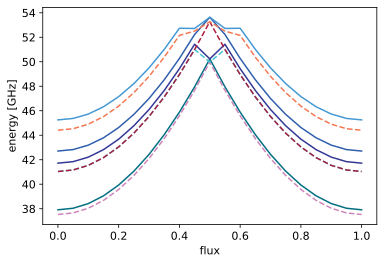

In [4]:
flux_list = np.linspace(0.0, 1.0, 21)
fig, axes = CM.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False)
CMVG.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False, fig_ax=[fig, axes])
axes.properties()['children'][4].set_linestyle('--')
axes.properties()['children'][5].set_linestyle('--')
axes.properties()['children'][6].set_linestyle('--')
axes.properties()['children'][7].set_linestyle('--')

In [24]:
x = np.array([[0,1], [1,0]])
xs = np.array([x, x])
print(xs)
np.matrix.prod(xs, axis=0)

[[[0 1]
  [1 0]]

 [[0 1]
  [1 0]]]


AttributeError: 'numpy.ndarray' object has no attribute '_collapse'

In [6]:
%mprun -f CMVG.kineticmat CMVG.kineticmat()

In [7]:
%lprun -f CMVG.kineticmat CMVG.kineticmat()

*** KeyboardInterrupt exception caught in code being profiled.

In [3]:
a_op_list = np.array([CMVG.a_operator(i) for i in range(CMVG.num_deg_freedom)])
minima_list = CMVG.sorted_minima()
minima_diff = minima_list[1]-minima_list[2]
Xi = CMVG.Xi_matrix()
%lprun -f CMVG._build_squeezing_ops CMVG._build_squeezing_ops(1, 2, minima_diff, Xi, a_op_list)

In [7]:
%lprun -f CMVG.potentialmat CMVG.potentialmat()

In [28]:
%lprun -f CMV.potentialmat CMV.potentialmat()

In [26]:
%lprun -f CMV.hamiltonian CMV.hamiltonian()

In [5]:
eigvals = CMV.eigenvals()
print(eigvals)

[37.51394954 41.0467031  41.04677482 44.44385195 44.54820087 44.56440727]


In [7]:
eigvals = CMV.eigenvals()
print(eigvals-eigvals[0])

[0.         2.79611152 2.81102498 5.58158613 5.59865452 5.60723912]


In [3]:
evals_holder_vchos = []
for ncut in range(1, 4):
    print(ncut)
    CMVG = qubit.CurrentMirrorVCHOSGlobal(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                                           kmax=1, global_exc=ncut, squeezing=False)
    evals = CMVG.eigenvals()
    evals_holder_vchos.append(evals)

1
2
3


In [4]:
evals_holder_ED = []
for ncut in range(1, 6):
    print(ncut)
    CM = qubit.CurrentMirror(N, ECB, ECJ, ECg, EJlist, nglist, flux, ncut=ncut)
    evals = CM.eigenvals()
    evals_holder_ED.append(evals)

1
2
3
4
5


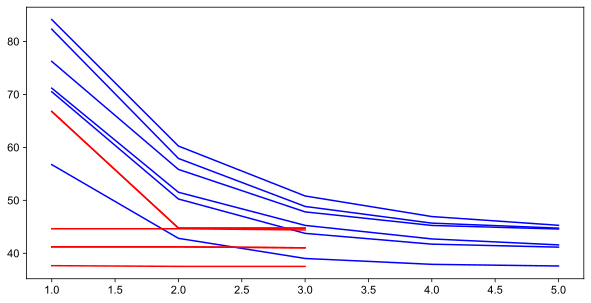

In [5]:
ncut_list = np.arange(1, 6)
fig,ax = plt.subplots(figsize=(10,5))
plt.plot(ncut_list, evals_holder_ED, color="blue")
plt.plot(ncut_list[0:3], evals_holder_vchos, color="red")
plt.show()

In [11]:
print(evals_holder)

[array([56.70140312, 70.46042775, 71.13782448, 76.19151844, 82.26184779,
       84.08820282]), array([42.80612023, 50.22657124, 51.50082666, 55.82116382, 57.87979284,
       60.22545979]), array([39.01382439, 43.75076327, 45.25837763, 47.81235394, 48.82732037,
       50.8098161 ]), array([37.91111698, 41.7203811 , 42.70902272, 45.25314106, 45.68702751,
       46.93290294]), array([37.60014853, 41.15974483, 41.58172879, 44.58520793, 44.7446738 ,
       45.28091933]), array([37.52073588, 41.03067135, 41.1629697 , 44.41647763, 44.52028604,
       44.689744  ])]


## Nearest Neighbor Calc 

In [13]:
def x0p(x0, y0, theta):
    return (x0*np.cos(theta)-y0*np.sin(theta))
def y0p(x0, y0, theta):
    return (x0*np.sin(theta)+y0*np.cos(theta))
def result(x0, y0, alpha, theta):
    return alpha*np.exp(-0.25*x0p(x0, y0, theta)**2)*np.exp(-0.25*(y0p(x0, y0, theta)/alpha)**2)
num = 100
mat = np.zeros((num, num))
for i, theta in enumerate(np.linspace(0, np.pi/2, num)):
    for j, e in enumerate(np.linspace(0.01, 1.0, num)):
        alpha = np.sqrt(1-e**2)
        nn_1 = result(2*np.pi, 0, alpha, theta)
        nn_2 = result(-2*np.pi, 0, alpha, theta)
        nn_3 = result(0, 2*np.pi, alpha, theta)
        nn_4 = result(0, -2*np.pi, alpha, theta)
        nn_max = np.max(np.array([nn_1, nn_2, nn_3, nn_4]))
        
        next_nn_1 = result(2*np.pi, 2*np.pi, alpha, theta)
        next_nn_2 = result(-2*np.pi, 2*np.pi, alpha, theta)
        next_nn_3 = result(2*np.pi, -2*np.pi, alpha, theta)
        next_nn_4 = result(-2*np.pi, -2*np.pi, alpha, theta)
        next_nn_max = np.max(np.array([next_nn_1, next_nn_2, next_nn_3, next_nn_4]))
        if next_nn_max > nn_max:
            mat[i, j] = 1.0
        else:
            mat[i, j] = -1.0

/home/dkweiss/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/home/dkweiss/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


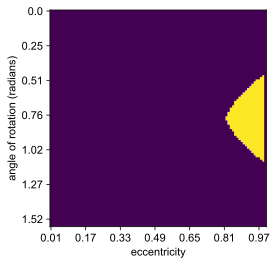

In [14]:
plt.imshow(mat)
x = np.linspace(0.01, 1.0, num)
y = np.linspace(0, np.pi/2, num)
nx = x.shape[0]
ny = y.shape[0]
no_labels = 7 # how many labels to see on axis x
step = int(nx / (no_labels - 1))
x_positions = np.arange(0,nx,step) # pixel count at label position
y_positions = np.arange(0,ny,step)
x_labels = np.round(x, decimals=2)[::step] # labels you want to see
y_labels = np.round(y, decimals=2)[::step]
plt.xticks(x_positions, x_labels)
plt.yticks(y_positions, y_labels)
plt.xlabel("eccentricity")
plt.ylabel("angle of rotation (radians)")
plt.show()